In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [24]:
import matplotlib.pyplot as plt
import re

def miss_pf_ratio(trace):
    # 파일 읽기
    file_path = f"./simulator/output/{trace}_output.txt"  # 파일 경로
    with open(file_path, "r") as f:
        data = f.read()

    # 데이터 저장
    prefetchers = []
    total_pfs = []
    miss_pfs = []
    miss_ratios = []

    # none 처리
    none_pattern = r"prefetcher\s*:\s*none"
    if re.search(none_pattern, data):
        prefetchers.append("none")
        total_pfs.append(0)
        miss_pfs.append(0)
        miss_ratios.append(None)


    # ✅ "nline"이 등장하는 지점 찾기
    nline_start = re.search(r"prefetcher\s*:\s*nline", data)
    if nline_start:
        data_after_nline = data[nline_start.start():]  # nline부터 데이터 시작
    else:
        data_after_nline = ""  # nline이 없으면 빈 문자열

    # 정규식으로 데이터 추출
    pattern = r"prefetcher\s*:\s*(\w+).*?total_pf\s*=\s*(\d+).*?miss_pf\s*=\s*(\d+)"
    matches = re.findall(pattern, data_after_nline, re.DOTALL)

    for match in matches:
        prefetcher, total_pf, miss_pf = match
        total_pf, miss_pf = int(total_pf), int(miss_pf)
        
        prefetchers.append(prefetcher)
        total_pfs.append(total_pf)
        miss_pfs.append(miss_pf)
        miss_ratios.append(miss_pf / total_pf if total_pf > 0 else 0)

    # 그래프 그리기
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # 막대 그래프 (회색 계열)
    ax1.bar(prefetchers, total_pfs, label="Total PF", color="#bfbfbf", alpha=0.8)
    ax1.bar(prefetchers, miss_pfs, label="Miss PF", color="#7f7f7f", alpha=0.8)
    ax1.set_ylabel("Total PF / Miss PF")
    ax1.set_xlabel("Prefetcher")
    ax1.legend(loc="upper left")

    # 꺾은선 그래프 (빨간색)
    ax2 = ax1.twinx()
    ax2.plot(prefetchers, miss_ratios, label="Miss PF (%)", color="red", marker="o", linestyle="dashed", linewidth=2)
    ax2.set_ylabel("Miss PF Ratio (%)")
    ax2.set_ylim(0, 1)  # Y축 범위 0~1로 고정
    ax2.legend(loc="upper right")

    plt.title(f"Prefetcher Performance ({trace})")
    plt.savefig(f"./graphs/prefetcher_performance_{trace}.png", dpi=300, bbox_inches="tight")  
    # plt.show()


In [25]:
traces = ['astar', 'bc', 'bfs', 'cc', 'mcf', 'pr', 'sssp']

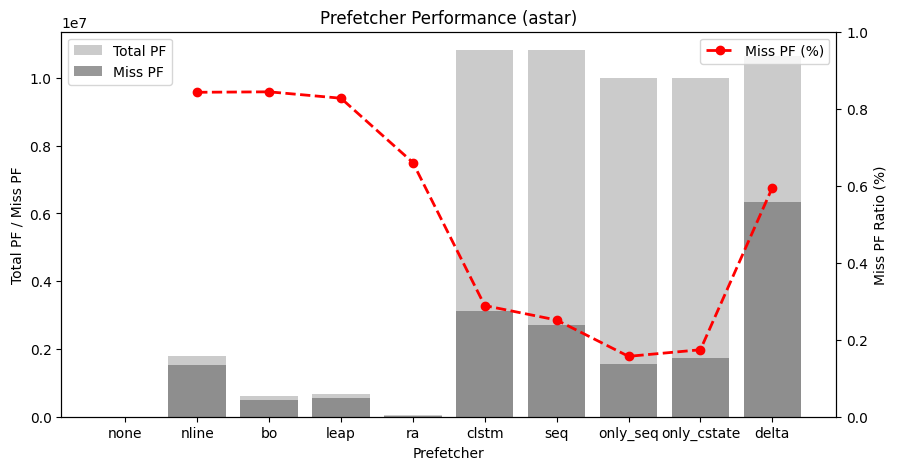

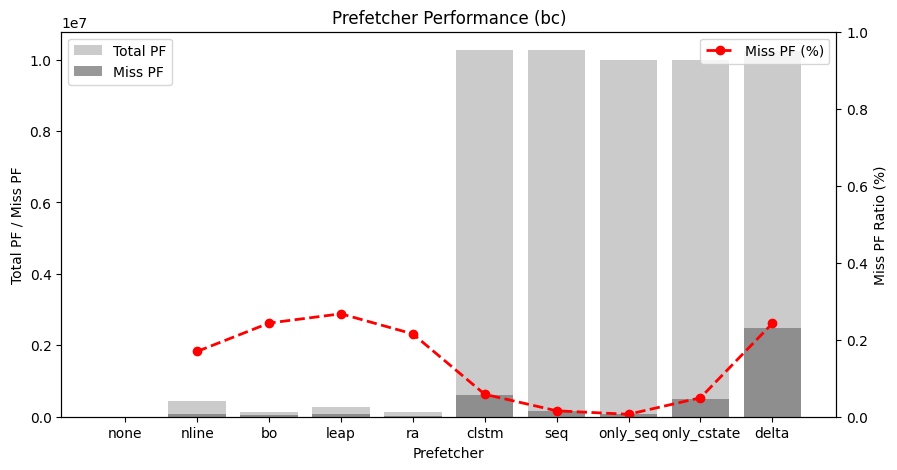

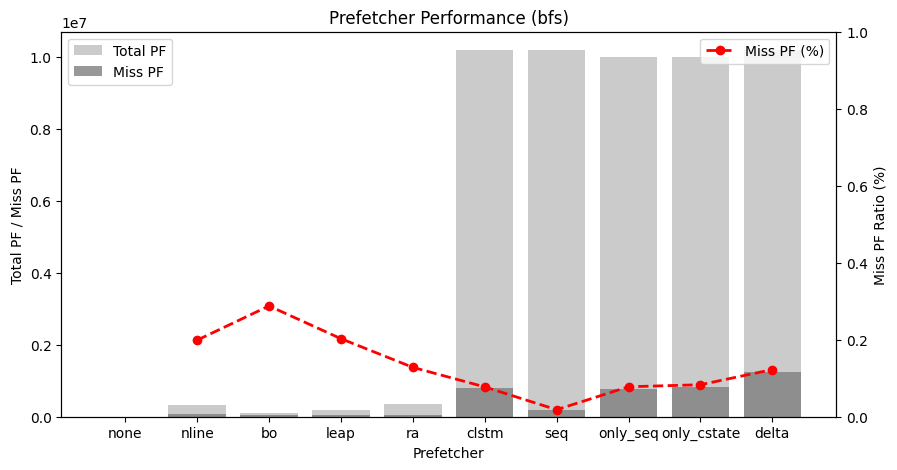

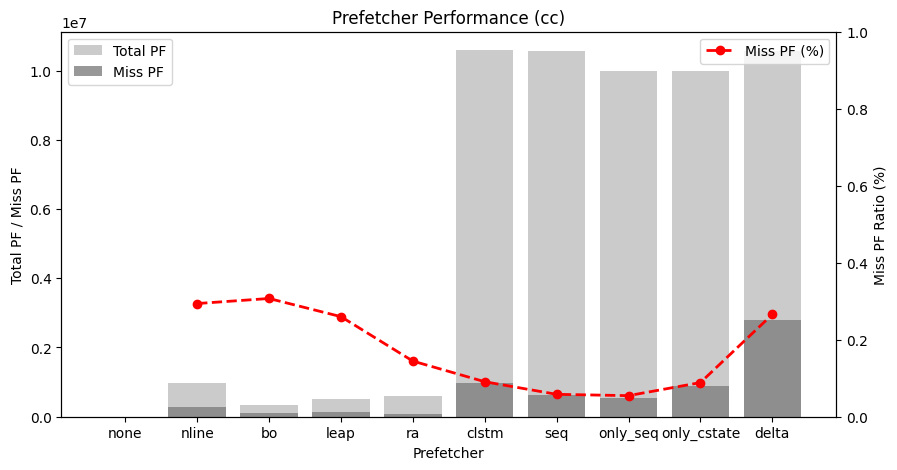

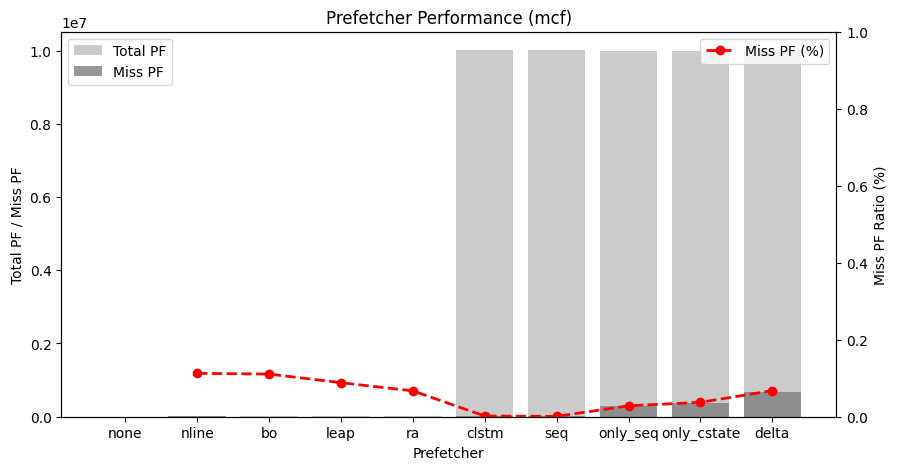

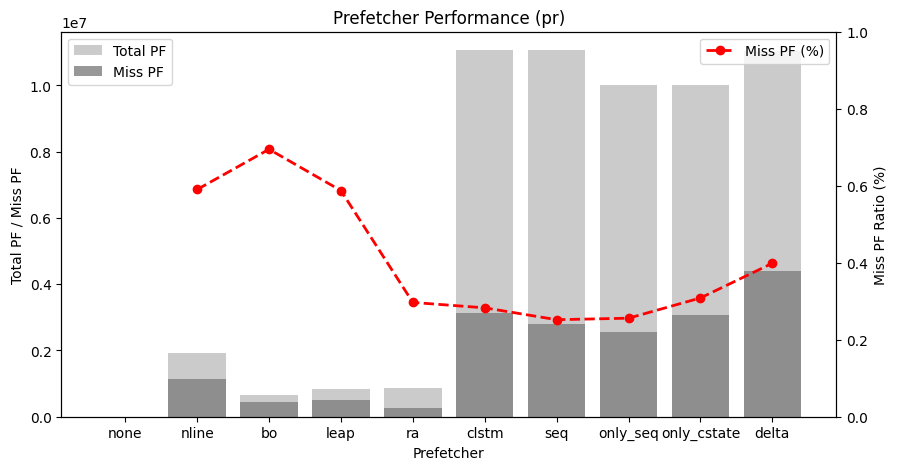

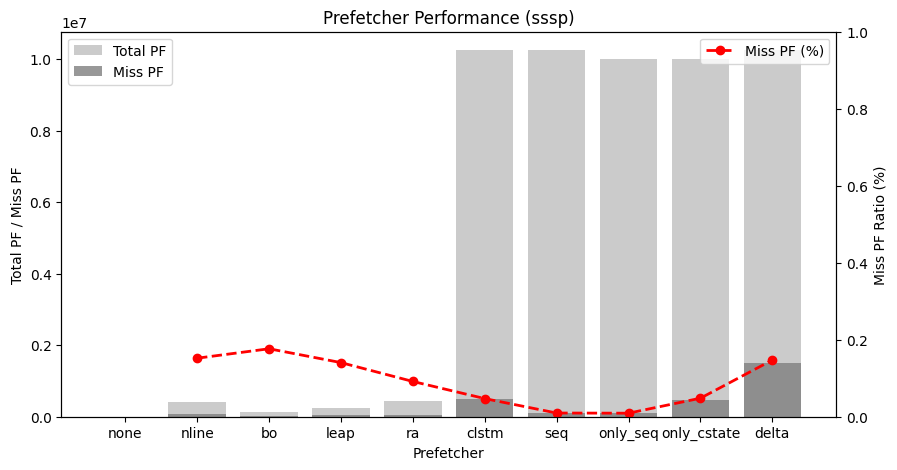

In [26]:
for trace in traces:
    miss_pf_ratio(trace)